<a href="https://colab.research.google.com/github/HarshShetye/Machine_Learning_1/blob/main/ML_1_Exp_1_60009210068_Harsh_Shetye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **60009210068_HARSH SHETYE_ML1_Expt.1**

Dataset Link https://drive.google.com/drive/folders/1O4AAj8ldNk_POMH7uXkC9ytp1Z4j3p0R?usp=sharing

# **Food Truck Data**

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,8)

Load Data

In [ ]:
data = pd.read_csv('/content/foodtruck.txt')
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [ ]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


EDA

visualise data

Text(0.5, 1.0, 'Population Vs Profit')

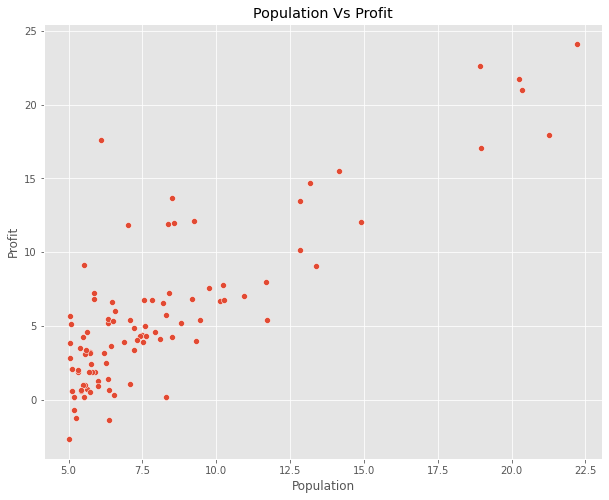

In [ ]:

ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Population Vs Profit")

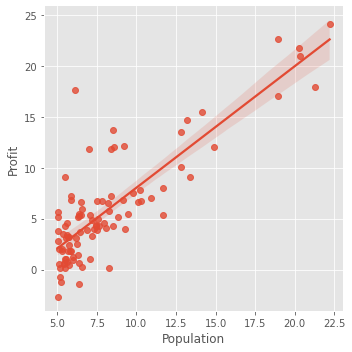

In [ ]:

sns.lmplot(x='Population',y='Profit',data=data)

<AxesSubplot:>

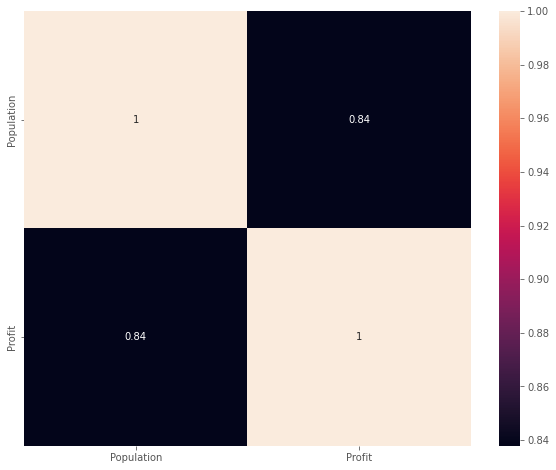

In [ ]:
sns.heatmap(data.corr(),annot=True)

Distplot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

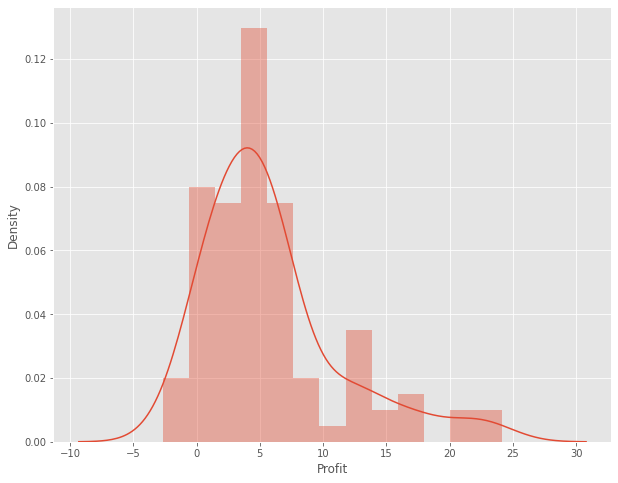

In [ ]:
sns.distplot(data['Profit'])

Compute Cost J theta

In [ ]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2

  return 1/ (2*m) * np.sum(error)

In [ ]:
m = data.Population.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape (m, 1)
theta = np.zeros((2, 1))

cost_function (X, y, theta)

32.072733877455676

Gradient descent

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs =[]
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * 1/m *error
    costs.append(cost_function(X, y, theta))
  return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha =0.01, iterations=1000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = -3.24 + 1.13x1


Visualising Cost Function

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])

    cost_values[i,j] = cost_function(X,y,t)

<ipython-input-198-c8d4d21a53c8>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection ='3d')


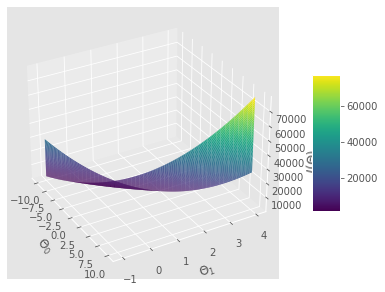

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.gca(projection ='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap ='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

ax.view_init(30, 330)

plt.show()

Plotting Convergence of JTheta

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

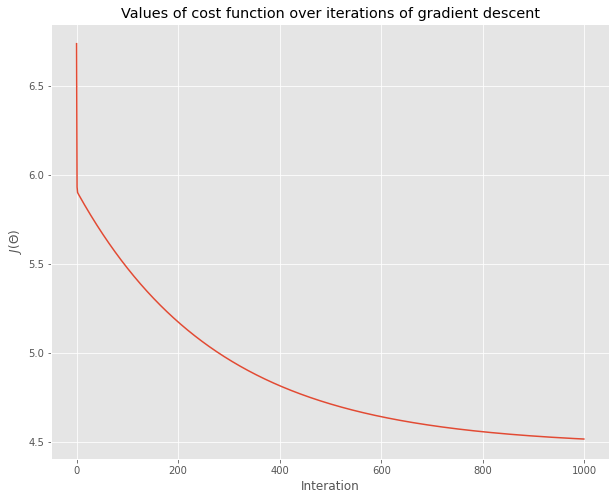

In [ ]:
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of gradient descent")

Training Data with Linear regression fit

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[-3.24140214],
       [ 1.1272942 ]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


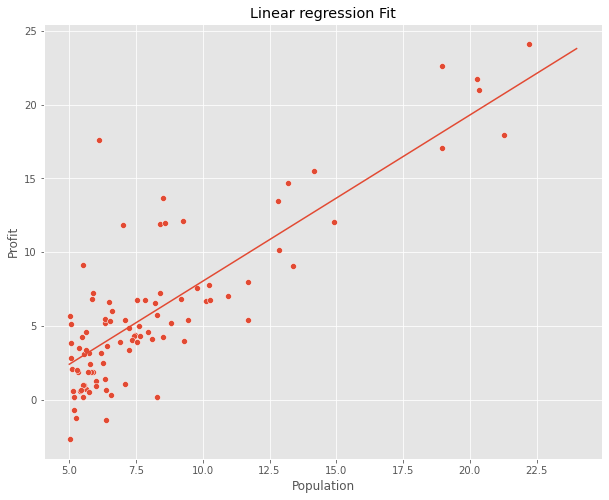

In [ ]:
theta = np.squeeze(theta)

sns.scatterplot(x = "Population", y = "Profit", data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value, y_value)

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear regression Fit");

Inference using the optimized theta value

In [ ]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [ ]:
y_pred_1 = predict(np.array([1, 4]), theta)*10000
y_pred_1

12677.746654383149

In [ ]:
y_pred_2 = predict(np.array([1, 8.3]), theta)*10000
y_pred_2

61151.397358795075

Split Dataset into Training and Testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop("Profit",axis=1)
y=data["Profit"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [ ]:
print("Number of samples in whole dataset:",len(data))
print("Number of samples in training dataset:",len(X_train))
print("Shape of X_train:",X_train.shape)
print("Number of samples in testing dataset:",len(X_test))
print("Shape of X_test:",X_test.shape)

Number of samples in whole dataset: 97
Number of samples in training dataset: 58
Shape of X_train: (58, 1)
Number of samples in testing dataset: 39
Shape of X_test: (39, 1)


Importing Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
print(reg.intercept_)

-3.3827678607517795


In [ ]:
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Population,1.125566


We can thus interpret that with 1 unit increase in Population is associated with an increase of 1.125566 units Profit

Predictions from our model

In [ ]:
y_pred=reg.predict(X_test)
y_pred

array([ 5.17502301,  5.0324138 ,  7.09647673,  3.78190997,  8.18129725,
        3.11591257,  4.74179266,  9.78635437,  4.36394015,  6.95015315,
        2.96508672, 19.432455  ,  3.14709074,  4.49979597,  2.27533988,
        2.83902333,  2.36628561,  4.60098435,  2.92749282,  3.74521652,
        6.20547869,  6.08144131,  7.61254875, 17.94108005,  5.95200122,
        7.02669164,  5.10422491,  2.96621229,  3.73767523,  3.77459379,
        4.03403675, 11.05599282,  2.79670205,  2.80716981,  8.95005883,
        3.58347268,  8.13852574,  2.52915501,  5.54679746])

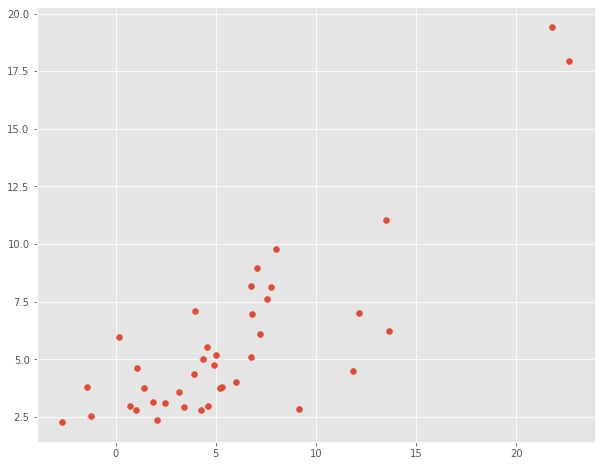

In [ ]:
plt.scatter(y_test,y_pred)

Residual Histogram

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


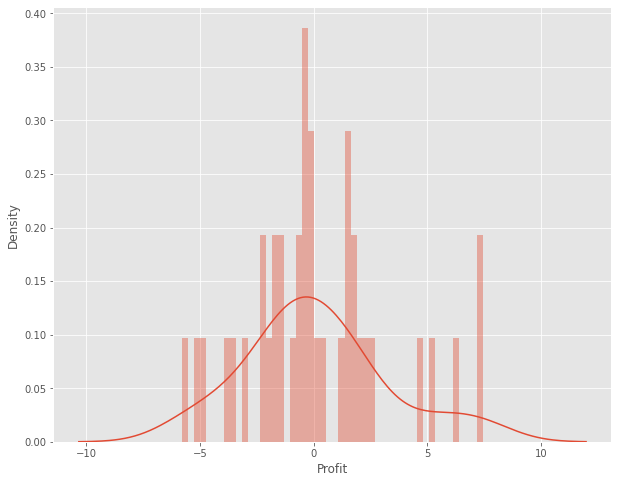

In [ ]:
sns.distplot((y_test-y_pred),bins=50);

Checking whether model overfits or underfits

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.3234057380800914
MSE: 9.60971593259975
RMSE: 3.099954182338789


In [ ]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.7193323954664781
0.6688557540741457


Since the score for training data is more when compared to testing data, the model overfits.

Now applying Lasso & Ridge Regularization

Lasso Regularization

In [ ]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=0.1, max_iter=1000, tol=0.1)
lasso_reg.fit(X_test,y_test)

Lasso(alpha=0.1, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

0.6888014595673204

In [ ]:
lasso_reg.score(X_train,y_train)

0.6914310168751615

Ridge Regularization

In [ ]:
ridge_reg=linear_model.Ridge(alpha=8, max_iter=1000,tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=8, max_iter=1000, tol=0.1)

In [ ]:
ridge_reg.score(X_train,y_train)

0.7192881785947994

In [ ]:
ridge_reg.score(X_test,y_test)

0.6673167844281542

Text(0, 0.5, 'Predicted Y')

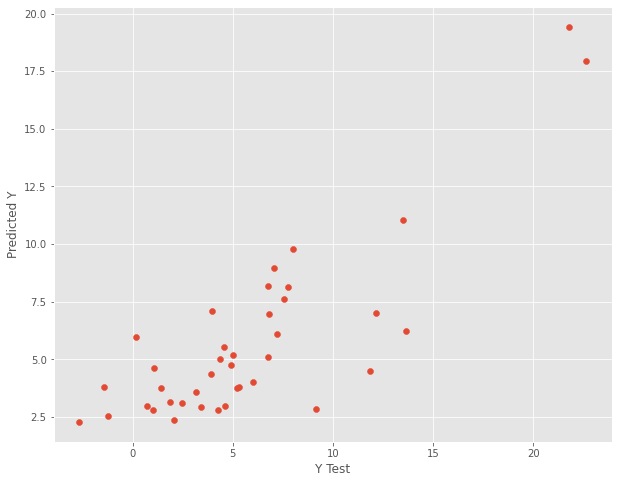

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Thus we can infer that Lasso Regularization is more effective than Ridge Regularization in tackling overfitting case.

# **Housing Data**

In [ ]:
df=pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

EDA

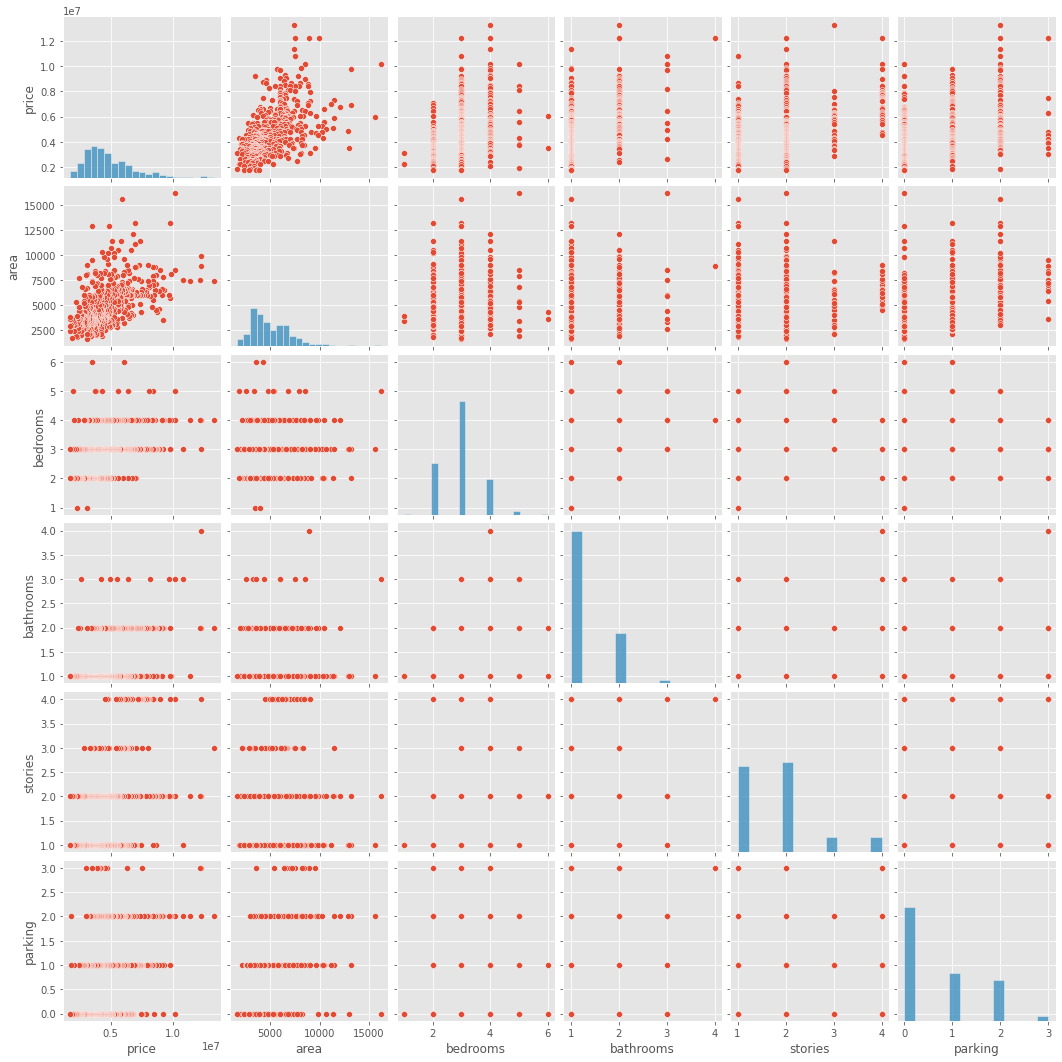

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

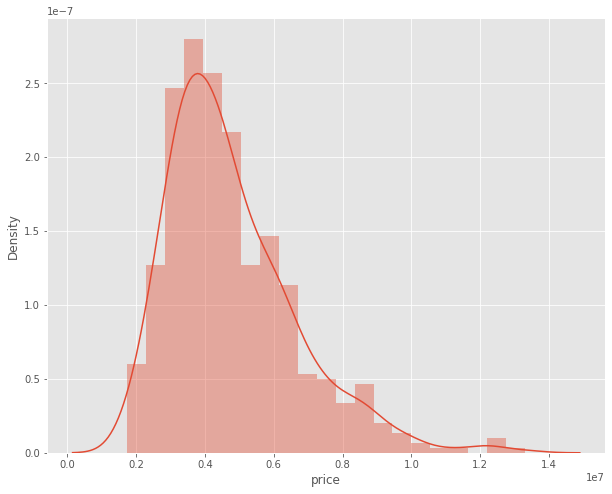

In [ ]:
sns.distplot(df['price'])

<AxesSubplot:>

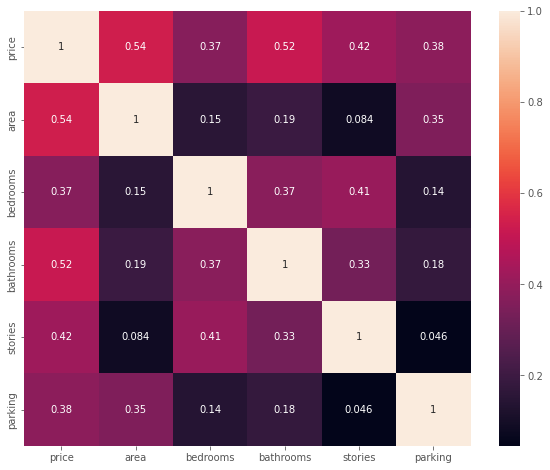

In [ ]:
sns.heatmap(df.corr(),annot=True)

Label categorical data using Label Encoder

In [ ]:
df1=df
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1['mainroad']= label_encoder.fit_transform(df1['mainroad'])
df1['guestroom']= label_encoder.fit_transform(df1['guestroom'])
df1['basement']= label_encoder.fit_transform(df1['basement'])
df1['hotwaterheating']= label_encoder.fit_transform(df1['hotwaterheating'])
df1['airconditioning']= label_encoder.fit_transform(df1['airconditioning'])
df1['prefarea']= label_encoder.fit_transform(df1['prefarea'])
df1['furnishingstatus']= label_encoder.fit_transform(df1['furnishingstatus'])

In [ ]:
df1.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


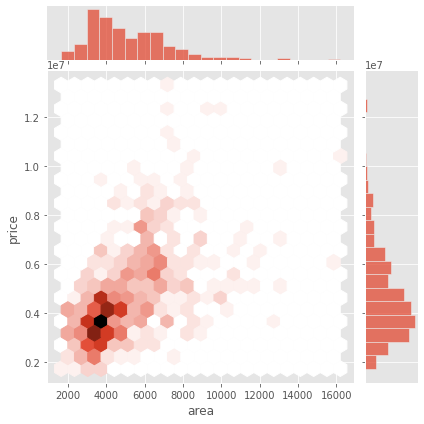

In [ ]:
sns.jointplot(x='area',y='price', kind='hex', data=df)

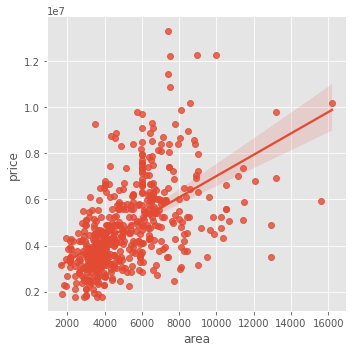

In [ ]:
sns.lmplot(x='area',y='price',data=df)

Split Dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X=df1.drop("price",axis=1)
y=df1["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [ ]:
print("Number of samples in whole dataset:",len(df1))
print("Number of samples in training dataset:",len(X_train))
print("Shape of X_train:",X_train.shape)
print("Number of samples in testing dataset:",len(X_test))
print("Shape of X_test:",X_test.shape)

Number of samples in whole dataset: 545
Number of samples in training dataset: 327
Shape of X_train: (327, 12)
Number of samples in testing dataset: 218
Shape of X_test: (218, 12)


Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

Coefficients of the model

In [ ]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 2.56561289e+02  5.20285723e+04  1.01370897e+06  4.61735302e+05
  4.19888303e+05  1.51850728e+05  4.52830140e+05  8.70679954e+05
  7.96978864e+05  2.86366145e+05  7.29114371e+05 -2.48635559e+05]


In [ ]:
coefficients = pd.DataFrame(reg.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
area,2.565613e+02
bedrooms,5.202857e+04
bathrooms,1.013709e+06
stories,4.617353e+05
mainroad,4.198883e+05
guestroom,1.518507e+05
basement,4.528301e+05
hotwaterheating,8.706800e+05
airconditioning,7.969789e+05
parking,2.863661e+05


Interpreting the coefficients:
Holding all the coefficients fixed, a 1 unit increase in area is associated with an increase of 256.56 price

1.   Holding all the coefficients fixed, a 1 unit increase in area is associated with an increase of 256.56 price
2.   Holding all the coefficients fixed, a 1 unit increase in bedrooms is associated with an increase of 52028.57 price
1.   Holding all the coefficients fixed, a 1 unit increase in bathsrooms is associated with an increase of 1013709 price
1.   Holding all the coefficients fixed, a 1 unit increase in stories is associated with an increase of 461735.3 price
2.   Holding all the coefficients fixed, a 1 unit increase in mainroad is associated with an increase of 419888.3 price
2.   Holding all the coefficients fixed, a 1 unit increase in guestroom is associated with an increase of 151850.7 price
1.   Holding all the coefficients fixed, a 1 unit increase in basement is associated with an increase of 452830.1 price
2.   Holding all the coefficients fixed, a 1 unit increase in hotwaterheating is associated with an increase of 870680.0 price
2.   Holding all the coefficients fixed, a 1 unit increase in airconditioning is associated with an increase of 796978.9 price
2.   Holding all the coefficients fixed, a 1 unit increase in parking is associated with an increase of 286366.1 price
2.   Holding all the coefficients fixed, a 1 unit increase in prefarea is associated with an increase of 729114.4 price
2.   Holding all the coefficients fixed, a 1 unit increase in furnishingstatus is associated with an decrease of 248635.6 price






Predicting Test Data

In [ ]:
y_pred=reg.predict(X_test)
y_pred

array([5234888.63530127, 6404408.85276636, 5047803.75060845,
       4916583.69147014, 4422777.64465125, 3573451.22019483,
       7052241.40320111, 3278522.31697268, 5129764.7833192 ,
       5628693.60170227, 4734562.85230603, 7522637.47657282,
       4386663.04694458, 4398175.02591813, 6415886.50442943,
       5702849.46940519, 5322104.40150039, 6713846.68630204,
       2611804.16798387, 3340850.63456173, 5097222.11777547,
       4639091.00347122, 6016449.78764482, 5853267.61890986,
       3610795.31620989, 3988968.19692697, 2612366.44848319,
       4199119.44171109, 3289127.2461461 , 4814397.69435317,
       6586564.2026383 , 3013397.39002595, 6819172.08491674,
       2647952.91428029, 6145023.63961794, 2896587.19901424,
       4687992.47785299, 7316507.42310682, 3672070.72364373,
       2601541.71641521, 4440996.37581143, 6619061.42866724,
       5133280.1877118 , 5717556.4210041 , 3105756.06564364,
       2717710.61104851, 5604627.71468256, 3944370.27840753,
       6886526.96922346,

Text(0, 0.5, 'Predicted Y')

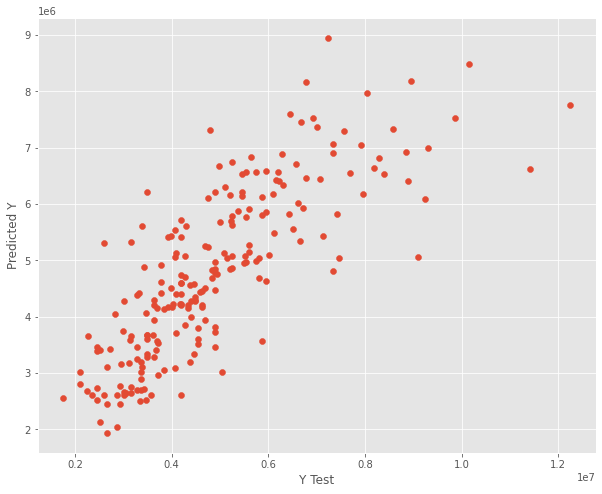

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Residual Histogram

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


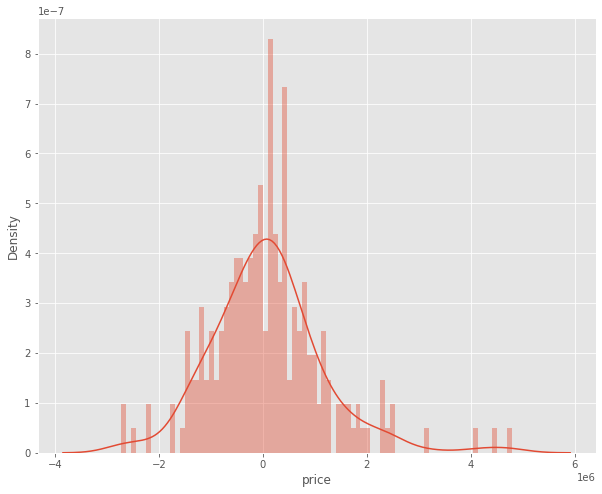

In [ ]:
sns.distplot((y_test-y_pred),bins=80);

Model Evaluation

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 794701.1600078315
MSE: 1213781296944.313
RMSE: 1101717.4306256177


Checking whether model overfits or underfits

In [ ]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.70370007018392
0.63267806061132


The model overfits

Applying Lasso and Ridge Regularization

In [ ]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=40, max_iter=10000,tol=0.1)
lasso_reg.fit(X_test,y_test)

Lasso(alpha=40, max_iter=10000, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

0.6514369908723183

In [ ]:
lasso_reg.score(X_train,y_train)

0.6841192502164566

In [ ]:
ridge_reg=linear_model.Ridge(alpha=50, max_iter=10000,tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=10000, tol=0.1)

In [ ]:
ridge_reg.score(X_train,y_train)

0.6740066702958953

In [ ]:
ridge_reg.score(X_test,y_test)

0.6132130397523035

Thus we can infer that Lasso Regularization is more effective than Ridge Regularization in tackling overfitting case.

# **Sine Wave**

In [ ]:
Features=["angle","sine_value","randomnoise","final value"]
DF=pd.DataFrame(columns=Features)
DF

,angle,sine_value,randomnoise,final value


In [ ]:
DF['angle']=np.linspace(np.pi/3,5*np.pi/3,120)
DF['sine_value']=np.sin(DF['angle'])

In [ ]:
DF

,angle,sine_value,randomnoise,final value
0,1.047198,0.866025,NaN,NaN
1,1.082397,0.883085,NaN,NaN
2,1.117597,0.899051,NaN,NaN
3,1.152797,0.913903,NaN,NaN
4,1.187997,0.927623,NaN,NaN
...,...,...,...,...
115,5.095188,-0.927623,NaN,NaN
116,5.130388,-0.913903,NaN,NaN
117,5.165588,-0.899051,NaN,NaN
118,5.200788,-0.883085,NaN,NaN


In [ ]:
import random
DF['randomnoise']=np.random.randn(120)/4
DF['final value']=DF['sine_value']+DF['randomnoise']

In [ ]:
DF

,angle,sine_value,randomnoise,final value
0,1.047198,0.866025,0.128743,0.994768
1,1.082397,0.883085,-0.340795,0.542290
2,1.117597,0.899051,0.566549,1.465600
3,1.152797,0.913903,-0.415850,0.498053
4,1.187997,0.927623,0.431527,1.359150
...,...,...,...,...
115,5.095188,-0.927623,-0.325209,-1.252831
116,5.130388,-0.913903,-0.404131,-1.318034
117,5.165588,-0.899051,0.293696,-0.605355
118,5.200788,-0.883085,-0.368548,-1.251633


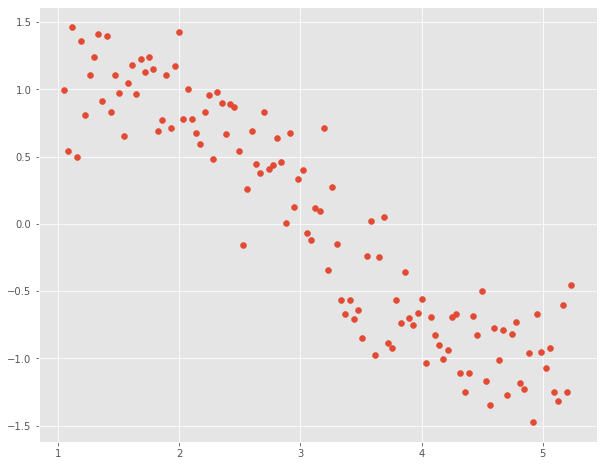

In [ ]:
plt.scatter(DF['angle'],DF['final value'])

In [ ]:
DF['error']=(DF['final value']-DF['sine_value'])**2

In [ ]:
DF

,angle,sine_value,randomnoise,final value,error
0,1.047198,0.866025,0.128743,0.994768,0.016575
1,1.082397,0.883085,-0.340795,0.542290,0.116141
2,1.117597,0.899051,0.566549,1.465600,0.320978
3,1.152797,0.913903,-0.415850,0.498053,0.172931
4,1.187997,0.927623,0.431527,1.359150,0.186216
...,...,...,...,...,...
115,5.095188,-0.927623,-0.325209,-1.252831,0.105761
116,5.130388,-0.913903,-0.404131,-1.318034,0.163322
117,5.165588,-0.899051,0.293696,-0.605355,0.086257
118,5.200788,-0.883085,-0.368548,-1.251633,0.135827


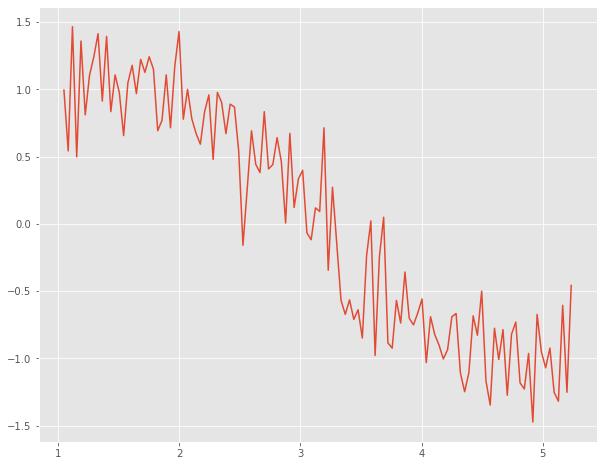

In [ ]:
plt.plot(DF['angle'],DF['final value'])

Compute Cost Function J(theta)

In [ ]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2
  return 1/ (2*m) * np.sum(error)

In [ ]:
m = DF.angle.size
X = np.append(np.ones((m, 1)), DF.angle.values.reshape(m, 1), axis=1)
y = DF.sine_value.values.reshape (m, 1)
theta = np.zeros((2, 1))

cost_function (X, y, theta)

0.30227685370369245

Gradient Descent

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs =[]
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * 1/m *error
    costs.append(cost_function(X, y, theta))
  return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha =0.01, iterations=1500)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = 1.63 + -0.53x1


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])

    cost_values[i,j] = cost_function(X,y,t)

<ipython-input-267-c8d4d21a53c8>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection ='3d')


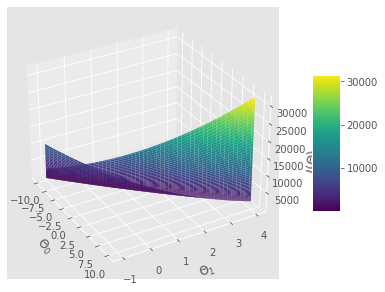

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.gca(projection ='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap ='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

ax.view_init(30, 330)

plt.show()

Plotting Convergence of J(theta)

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

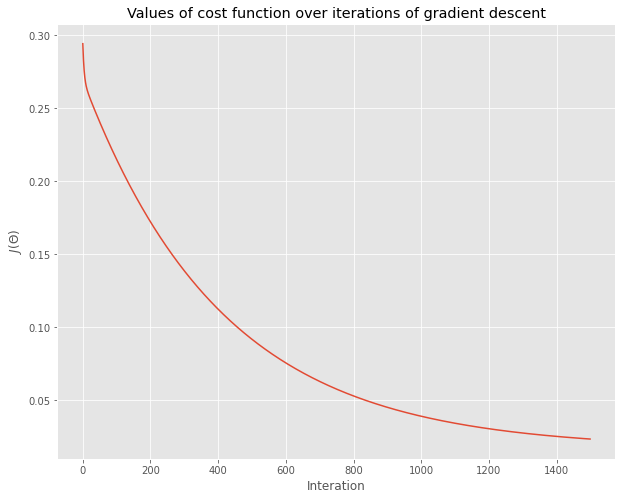

In [ ]:
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of gradient descent")

Training Data with Linear Regression fit

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[ 1.62886628],
       [-0.53075579]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


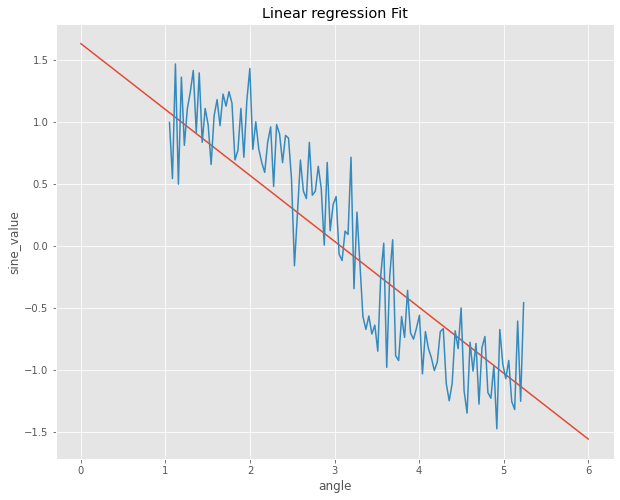

In [ ]:
theta = np.squeeze(theta)

x_value = [x for x in range(0,7)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value,y_value)
plt.plot(DF['angle'],DF['final value'])

plt.xlabel("angle")
plt.ylabel("sine_value")
plt.title("Linear regression Fit");

Inference using the optimized theta value

In [ ]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [ ]:
y_pred_1 = predict(np.array([1,0.10472]), theta)
y_pred_1

1.5732855336841038